In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

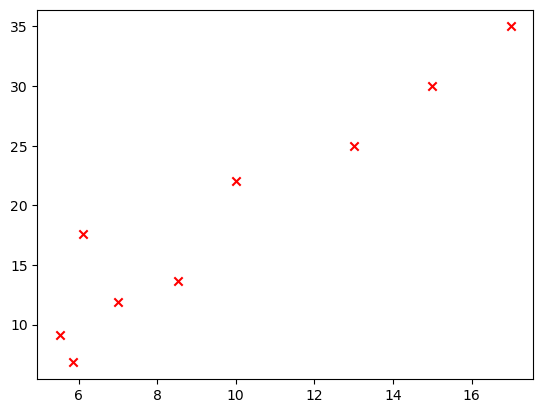

In [2]:
# Data for example
x_train = np.array( [6.1101, 10,13,15,17,5.5277, 8.5186, 7.0032, 5.8598])
y_train = np.array([17.592,22,25,30,35, 9.1302, 13.662,  11.854,  6.8233])
plt.scatter(x = x_train,y = y_train,marker='x',color = 'r')

**Goal**
- Our goal is to implement a model which can predicate `y_train` based on only one feature `x_train`.
- We will use <b>Linear Regression model</b> to predicate the incoming `x_test`

- The first step is calculating the cost function which will measure the error in our model 

- To remember $$\mathbf f_{w,b}(x^{(i)}) = wx^{(i)}+b $$

- Cost function : $$\mathbf cost^{(i)} = (f(x)^{(i)} - y^{(i)})^2$$

- Total cost: $$\mathbf j_{(w,b)} = 1/2m \sum\limits_{i=0}^{m-1} cost^{(i)} $$

In [3]:
def cost_func (x,y,w,b):
    cost = 0 
    m = x.shape[0]                               # initialize the total cost with 0
    for i in range(m):                           # loop for x_train            # loop for y_train             
        predicted_out = w*x[i] +b                # predicate the output with linear regression model
        cost = cost + (predicted_out - y[i])**2  # compute cost
            
    return  (1/(2*m))*cost


In [4]:
cost_func(x_train,y_train,0.001,1)

203.5357426865134

**Good so far !!**

- Now let's compute the gradient descent function:
    - we have two parameter to update w,b ![image.png](attachment:image.png)

In [5]:
def gradient_func(x,y,w,b):
    total_w = 0
    total_b = 0
    m = x.shape[0]
    for i in range(m):
        predicted_out = w*x[i] + b
        j_w = (predicted_out - y[i])*x[i]    # compute gradient for each example of w
        total_w = total_w + j_w
        j_b = (predicted_out - y[i])         # compute gradient for each example of b
        total_b = total_b + j_b
    return (1/m)*total_w , (1/m)*total_b

In [6]:
def generate_parameters(x,y,w_in,b_in,cost_func,gradient_func,learning_rate,num_iterations):

    b = b_in
    w = w_in
    
    for i in range(num_iterations):
        
        b = b - learning_rate*(gradient_func(x,y,w,b)[1])
        w = w - learning_rate*gradient_func(x,y,w,b)[0]
        v = np.array([[w],[b]])
        if np.linalg.norm(v,1) < 1:
            print("!!")
            return w,b ,cost_func(x,y,w,b)
    return w,b ,cost_func(x,y,w,b)

In [7]:
gradient_func(x_train,y_train,0.001,1)

(-210.9235408531622, -17.997053400000002)

- We only use one  ond one b 

In [8]:
def generate_parameters(x,y,w_in,b_in,cost_func,gradient_func,learning_rate,num_iterations):

    w = w_in
    b = b_in
    cost = 0

    for i in range(num_iterations):
        j_w , j_b = gradient_func(x,y,w,b)
        w = w - learning_rate*j_w
        b = b - learning_rate*j_b

    cost = cost_func(x,y,w,b)
    return w,b,cost

In [11]:
w,b,cost = generate_parameters(x_train, y_train, 0.1, 1, cost_func, gradient_func, 0.001, 40)

In [12]:
w,b

(1.859285100840103, 1.1354602770227857)

In [13]:
m = x_train.shape[0]
predicted = np.array(range(m))

In [14]:
for i in range(predicted.shape[0]):
    predicted[i]=w*x_train[i]+b

In [15]:
predicted

array([12, 19, 25, 29, 32, 11, 16, 14, 12])

Text(0.5, 1.0, 'Simple Regression model')

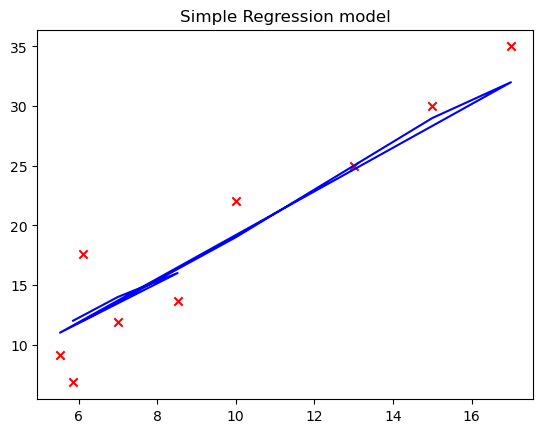

In [16]:
plt.plot(x_train,predicted,color = 'b')
plt.scatter(x_train,y_train,marker='x',color ='r')
plt.title("Simple Regression model")